In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale

In [17]:
df = pd.read_csv("Data/raw_data.csv", index_col=0)

df['video_published_date'] = df['video_published_date'].astype('datetime64[ns]')

df.drop(["video_favoriteCount", "likesVSsubs", "viewsVSsubs"], axis=1, inplace=True)
display(df.head())

reduced_data = pd.read_csv("/Users/prabhjotsingh/Downloads/rating.csv", header=0)

reduced_data = reduced_data[['video_id', 'rating', 'raw_rating']]
reduced_data = reduced_data.set_index('video_id')
df = df.set_index('video_id')

print(df.dtypes)

df_orig = df.copy()
df = df.join(reduced_data, how='inner', lsuffix='_l', rsuffix='_r')

print(min(df['published_at']), max(df['published_at']))

df.describe()

,title,published_at,subscriberCount,videoCount,viewCount,video_published_date,video_commentCount,video_viewCount,video_likeCount,video_dislikeCount,video_id,likesVSviews
0,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-03-03 03:29:19,152,14243,422,265,w-FO8lGpyBE,0.011023
1,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-02-26 18:22:26,105,38774,1003,52,5UZ1WNxbUj4,0.024527
2,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-02-11 18:13:12,95,42334,1445,43,ZgqcvqZnKCY,0.033118
3,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-01-30 18:24:55,105,35996,772,111,wO0a2C6PqtY,0.018363
4,Team Coco,2008-06-23T02:45:04.000Z,7730000,8411,6551340275,2020-01-21 18:14:09,77,48912,1101,54,9K5z_kYd6Sg,0.021406


title                           object
published_at                    object
subscriberCount                  int64
videoCount                       int64
viewCount                        int64
video_published_date    datetime64[ns]
video_commentCount               int64
video_viewCount                  int64
video_likeCount                  int64
video_dislikeCount               int64
likesVSviews                   float64
dtype: object
2006-01-08T09:41:20.000Z 2019-05-21T17:15:09.000Z


,subscriberCount,videoCount,viewCount,video_commentCount,video_viewCount,video_likeCount,video_dislikeCount,likesVSviews,rating,raw_rating
count,3.395000e+03,3395.000000,3.395000e+03,3395.000000,3.395000e+03,3.395000e+03,3395.00000,3395.000000,3395.000000,3395.000000
mean,1.441850e+06,1092.118999,6.746504e+08,853.501915,1.463109e+06,2.273504e+04,826.16377,0.016938,0.356470,0.016938
std,4.142527e+06,1175.857367,2.351640e+09,2781.218786,5.718810e+06,7.738049e+04,3323.79067,0.011236,0.225929,0.011236
min,0.000000e+00,0.000000,0.000000e+00,0.000000,1.090000e+02,0.000000e+00,0.00000,-0.020355,0.000000,-0.020355
25%,9.990000e+04,429.000000,7.745374e+07,32.000000,3.123800e+04,4.415000e+02,29.00000,0.009033,0.182881,0.009033
50%,9.170000e+05,880.000000,2.727134e+08,107.000000,1.177680e+05,1.944000e+03,100.00000,0.015182,0.321807,0.015182
75%,1.000000e+06,1641.000000,4.060855e+08,430.500000,5.089470e+05,9.246000e+03,355.00000,0.022420,0.485326,0.022420
max,2.410000e+07,8411.000000,1.346775e+10,51390.000000,1.390134e+08,1.012216e+06,76719.00000,0.143433,1.000000,0.143433


In [4]:
 def compute_features(df):
    df_copy = df.copy()
    #df_copy['likesVSsubs'] = df_copy['video_likeCount']/df_copy['subscriberCount']
    #df_copy['viewsVSsubs'] = df_copy['video_viewCount']/df_copy['subscriberCount']
    df_copy['likesVSviews'] = ((df_copy['video_likeCount']-df_copy['video_dislikeCount'])/df_copy['video_viewCount'])

    #df_copy = df_copy[(df_copy['likesVSsubs']<1) & (df_copy['likesVSsubs']>0)]
    #df_copy = df_copy[(df_copy['viewsVSsubs']<1) & (df_copy['viewsVSsubs']>0)]
    df_copy = df_copy[(df_copy['likesVSviews']<0.1) & (df_copy['likesVSviews']>0)]

    #df_copy['log_likesVSsubs'] = np.log(df_copy['likesVSsubs'])
    #df_copy['log_viewsVSsubs'] = np.log(df_copy['viewsVSsubs'])
    #df_copy['log_likesVSviews'] = np.log(df_copy['likesVSviews'])
    return df_copy

df_copy = compute_features(df)
df_copy_2 = compute_features(df_orig)#df_copy[df_copy["likesVSviews"]<=0.15]
df_copy[['video_viewCount', 'video_likeCount', 'video_dislikeCount', 'rating']].describe(percentiles=[0.1,0.25,0.50,0.75,0.90])

,video_viewCount,video_likeCount,video_dislikeCount,rating
count,3.366000e+03,3.366000e+03,3366.000000,3366.000000
mean,1.475559e+06,2.292212e+04,829.830362,0.358353
std,5.741818e+06,7.768572e+04,3335.664695,0.223705
min,1.090000e+02,1.000000e+00,0.000000,0.000000
10%,9.588000e+03,1.070000e+02,7.000000,0.100004
25%,3.222250e+04,4.570000e+02,30.000000,0.185102
50%,1.200755e+05,1.991500e+03,100.500000,0.323354
75%,5.135090e+05,9.380250e+03,355.750000,0.486618
90%,2.087380e+06,3.816600e+04,1293.500000,0.665234
max,1.390134e+08,1.012216e+06,76719.000000,1.000000


In [5]:
#g = sns.FacetGrid(df_copy, row="title", height=2.5, aspect=3.5)
#g.map(sns.distplot, "likesVSviews", color="blue");

In [6]:
#display(sns.distplot(df_copy['video_viewCount'], bins=50, kde=False))

#display(sns.lineplot(df_copy['video_published_date'], df_copy['video_viewCount']))
#display(sns.distplot(df_copy_2['likesVSviews'], bins=50))

In [7]:
#x = df_copy[(df_copy['likesVSviews']>0.005)&(df_copy['likesVSviews']<0.04)]['likesVSviews']

print(df_copy['video_viewCount'].value_counts(bins=60))

#sns.distplot(x)
#len(x)

(-138904.321, 2316997.667]        3047
(2316997.667, 4633886.333]         105
(4633886.333, 6950775.0]            45
(9267663.667, 11584552.333]         28
(6950775.0, 9267663.667]            27
(13901441.0, 16218329.667]          18
(11584552.333, 13901441.0]          16
(25485884.333, 27802773.0]          13
(20852107.0, 23168995.667]          12
(16218329.667, 18535218.333]         8
(30119661.667, 32436550.333]         8
(27802773.0, 30119661.667]           6
(23168995.667, 25485884.333]         6
(18535218.333, 20852107.0]           5
(32436550.333, 34753439.0]           5
(39387216.333, 41704105.0]           2
(41704105.0, 44020993.667]           2
(44020993.667, 46337882.333]         2
(46337882.333, 48654771.0]           2
(71823657.667, 74140546.333]         1
(34753439.0, 37070327.667]           1
(37070327.667, 39387216.333]         1
(50971659.667, 53288548.333]         1
(53288548.333, 55605437.0]           1
(60239214.333, 62556103.0]           1
(62556103.0, 64872991.667

In [8]:
df_copy.describe()

,subscriberCount,videoCount,viewCount,video_commentCount,video_viewCount,video_likeCount,video_dislikeCount,likesVSviews,rating,raw_rating
count,3.366000e+03,3366.000000,3.366000e+03,3366.000000,3.366000e+03,3.366000e+03,3366.000000,3366.000000,3366.000000,3366.000000
mean,1.449585e+06,1092.986631,6.788023e+08,859.570707,1.475559e+06,2.292212e+04,829.830362,0.016958,0.358353,0.016958
std,4.159294e+06,1179.808346,2.361285e+09,2791.975712,5.741818e+06,7.768572e+04,3335.664695,0.010491,0.223705,0.010491
min,0.000000e+00,0.000000,0.000000e+00,0.000000,1.090000e+02,1.000000e+00,0.000000,0.000082,0.000000,0.000082
25%,9.990000e+04,429.000000,7.745374e+07,32.000000,3.222250e+04,4.570000e+02,30.000000,0.009131,0.185102,0.009131
50%,9.170000e+05,880.000000,2.727134e+08,108.000000,1.200755e+05,1.991500e+03,100.500000,0.015250,0.323354,0.015250
75%,1.000000e+06,1641.000000,4.060855e+08,435.000000,5.135090e+05,9.380250e+03,355.750000,0.022477,0.486618,0.022477
max,2.410000e+07,8411.000000,1.346775e+10,51390.000000,1.390134e+08,1.012216e+06,76719.000000,0.094248,1.000000,0.094248


In [9]:
# df_copy['subscriberCountNorm'] = MinMaxScaler().fit_transform(df_copy['subscriberCount'].values.reshape(-1,1))
# df_copy['video_viewCountNorm'] = MinMaxScaler().fit_transform(df_copy['video_viewCount'].values.reshape(-1,1))
# df_copy['likesVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['likesVSsubs'].values.reshape(-1,1))
# df_copy['viewsVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['viewsVSsubs'].values.reshape(-1,1))
# df_copy['log_likesVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['log_likesVSsubs'].values.reshape(-1,1))
# df_copy['log_viewsVSsubsNorm'] = MinMaxScaler().fit_transform(df_copy['log_viewsVSsubs'].values.reshape(-1,1))
# df_copy['popularity'] = 0.3*df_copy['viewsVSsubsNorm']+0.7*df_copy['likesVSsubsNorm']
# df_copy['log_popularity'] = np.log(0.3*df_copy['viewsVSsubsNorm']+0.7*df_copy['likesVSsubsNorm'])

(3366, 3)


/Users/prabhjotsingh/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


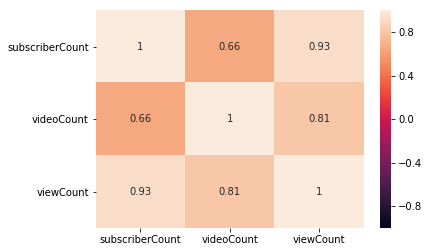

In [15]:
corr = df_copy[['subscriberCount', 'videoCount', 'viewCount', 'video_commentCount', 'video_likeCount', 
                'video_dislikeCount', 'rating']].corr()

df_channels = df_copy[['subscriberCount', 'videoCount', 'viewCount']]#['video_commentCount', 'video_likeCount', 'video_dislikeCount', 'video_viewCount', 'rating']].copy()
print(df_channels.shape)
df_channels.drop_duplicates(['subscriberCount', 'videoCount', 'viewCount'], inplace=True)
#print(df_channels.shape)
corr = df_channels.corr(method='spearman')

mask = np.zeros_like(corr)
#mask[np.tril_indices_from(mask)] = True
#mask[abs(corr)<0.3] = True
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1)

In [11]:
for _id in df_copy.index:
    print(_id)

w-FO8lGpyBE
5UZ1WNxbUj4
ZgqcvqZnKCY
wO0a2C6PqtY
9K5z_kYd6Sg
b7RhBZvPufc
_u7AVpqyM4k
BHhrybpwc1g
C8WG4a2QXHU
srlZC4hbvkw
EbUQ51vv0KY
jBc4Gl_BRts
GRUaq51av9o
eGO9aR6de2E
wV-NcNwXqcA
mf5QyS5S54o
3vGa_Gejmac
NeGwR5CeyLg
T6uAXwwCZRA
TK1lsJvkNsY
AqCj3vJpOD0
1III07Eb1VM
mBdejoT-aNY
5LjyE31aHgA
4eiyui0dF5o
oImXZDxKUOc
5ZOBoaCtCm4
BJ8DZeTOWsQ
ZzBMY8HgKAg
vGqQlMbaJ0k
NLmB3_jnuLg
_FhhWBl6iIU
Lc81vSTHGMY
2YVwe5EtVog
qWPVTGV6uoM
KhzAccxnz-o
_ssrI0Sx9rk
LZygXTVLHOc
FQlXJaoU-6U
0Eo9owk869s
nc75y7q-8NU
RGAUU15mlq4
um5XSNNvEdg
FHGx0FLyV0Y
TBOcKwMVTNQ
v0bwcz5oKLA
gCZzSUhZazc
aZyOHhmvJFU
l85yfV8Srnw
RRwCg2CyaqA
sN7d8ExiL_o
MZHQIIJD4ps
Dzrc1DhqxQM
4YMfF02s3Co
FWZxAy1ra0c
niIJyrbSPAk
aLANcb1p4_M
MALr2ob3rjw
WaZoUicVB38
odfqJzDG7i4
sXw5erI-OWo
o9FL0e4v15s
2s3GzE4-WQI
zp0TJSyLX40
58R6OPsw9k8
eqp2Fw4Un0g
fnQW4ZGuYAo
urp5PwDM57c
TS1ZL_aZ1KA
NQSGtRWA6ZA
wYQCB3v_xj4
exN4ke9l3g0
KLXkdbDoT0I
_bre-E3lurE
-ysNeF9auGs
PzVpMxYueyw
prMwE138M5c
J312pT206rQ
xQeOPHyBZGg
vuWTm0Mi_UA
f32cmndkkmQ
2APDyzrdlDo
JpCiXV10L1o
ESrj

cMPk56Onzlg
Q9D8vFHjvgI
cOGBci-HsQg
KUuLWZI7iOg
pMMC6Y_bp88
U1_bIPPPxz4
9ShGWq6zATk
PYFCTND-r3g
vR5IykKENCE
7ciqLF6piUw
ujzy4cCUFk0
kIVUc6AM8ds
auxxekIKhSY
dSoJcf0alVU
PyDzAkfFuks
FHn33L_CFtg
HXrEOiGYsAw
3fyVd75_CQY
olLcs584Hec
gerUKdURxXk
A0zLgD2zjuc
oWEGNIhv5lk
Khyl3pA1i7U
lEohOzYAdSw
CLw_OMv1axc
Vh-AB9Xu8wQ
DI1qsBVrsIs
xCvsqAdEPIc
rSsO_XjYPbw
4QhHC1pML5A
HLSkXHUSQ50
ym--KYLbUjA
afkO_xJPI4o
H-Xis5kEKbE
RD7W21UQls0
kWAj-_Kj9-Q
GQH69ATDy9U
3RDVwPRFv38
3ZWXmROWeXU
j5J7fAdIbpY
1VtetpdY4Ow
iOLBbVjQEaw
nrrM6xVa2Vs
y6orvGbx1nE
Fu8BUrnsbPA
vpFxcUSL_4Q
ZY5XH7_asf0
-gjTmK5K3qs
9m86UtP4JNU
PqqaqC6tmLQ
s3DMr6JQyJ4
3sLJBs-NYNA
mxZBrbVqZnU
3mC6q_Yz9ls
HYw4YyUIVl0
cxvOVNcCFRI
r5OaSZierwc
QL_zi-EXdYI
qUOmlE-O5Pg
ASrhIA3a2QI
IzYJCqD117A
fH3_PVxYXBc
u4gwz-PARC4
IDqD4BYtFU8
cMJyzEI6zms
Lo0k0rhsOw8
6AO5S4JDKvc
qXg_akLPq5o
ceIRC2fWTCU
_Im4-7LQQRk
ajci4AJdbOU
AwBUj7M6TMQ
ybLIOJOrNiM
k3JM9zoKGmw
bjGUeI35VPI
LUzKC0BzP8w
CgJ_g4vwg6g
0rZzNFHuvvs
j65jhGZUJv8
gyIXaMUlzRU
fCr39r8vCE0
xGRpfT26TcA
_xVyn7iy2Uw
xlon